In [2]:
import keras
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd
import os

list_classes = []

#listing all the image classes available , which are the names of the different folders containing images 

for root , dirs , files in os.walk(r'E:\Code\AnimalClassifierCNN\AnimalClassifier\images'):
    
    for folder in dirs:
        
        list_classes.append(folder)
        
print(list_classes)

#creating a dict assigning an individual number to each class 
class_dict = dict()

for i in range(len(list_classes)):
    
    class_dict[list_classes[i]] = i 


['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [3]:
import os
import glob
import cv2


#loading all the images in all the folders

def load_data(img_path , classes):
    
    x = []
    y = []
    
    for img_type in classes:
        
        path = os.path.join(img_path , img_type)
        
        for i in os.listdir(path):
            
            file_path = os.path.join(path , i)
            img = image.imread(file_path)
            img_resized = cv2.resize(img , (100,100))
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            x.append(img_resized)
            y.append(class_dict[img_type])
            
    return x , y 



X , Y = load_data('images' , list_classes)


#print(X[0])

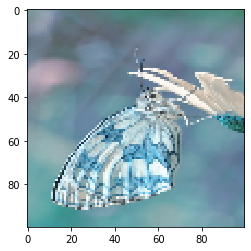

In [4]:
x_copy = X.copy()
y_copy = Y.copy()

plt.imshow(x_copy[0])
plt.show()

In [5]:
#function to get the name of the class 

from keras.utils import to_categorical

def get_class_name(class_num):
    
    for c in class_dict.keys():
        
        if class_dict[c] == class_num:
            
            return c

x = np.array(x_copy)
x = (x * 255).astype(np.uint8)
y = np.array(y_copy)

y = to_categorical(y)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


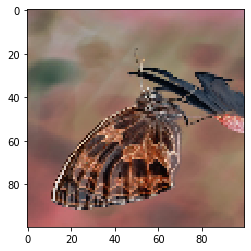

In [6]:
plt.imshow(x[0])
print(y[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


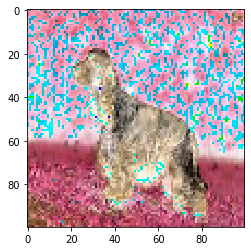

In [7]:
#test and train data split

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33)

plt.imshow(x_train[0])
print(y_train[0])

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D , Dense , Flatten , Dropout , MaxPooling2D

batch_size = 50

model = Sequential()
model.add(Conv2D(128 , kernel_size = 10 ,strides = [2,2] , input_shape = ( 100 , 100 , 3) ,activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Conv2D(64 , kernel_size = 5  , strides = [2,2] , activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Conv2D(32 , kernel_size = 3 , activation = 'relu'))
model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.4)) 
model.add(Dense(10 , activation = 'softmax'))

In [13]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
train_history = model.fit(x_train , y_train , validation_data = (x_test , y_test),
epochs = 3 )

Train on 17539 samples, validate on 8640 samples
Epoch 1/3
17539/17539 [==============================] - 21s 1ms/step - loss: 14.7692 - acc: 0.0836 - val_loss: 14.8048 - val_acc: 0.0815
Epoch 2/3
17539/17539 [==============================] - 20s 1ms/step - loss: 14.8760 - acc: 0.0770 - val_loss: 15.1294 - val_acc: 0.0613
Epoch 3/3
17539/17539 [==============================] - 20s 1ms/step - loss: 14.8399 - acc: 0.0793 - val_loss: 14.8048 - val_acc: 0.0815


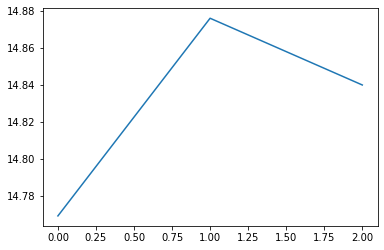

In [15]:
plt.plot(train_history.history['loss'])
plt.show()

In [10]:

test_sample= x_test[0]
test_sample = np.array([test_sample])

model.predict(test_sample)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
def get_prediction(input_image:[float] , model:keras.models.Sequential()):
    
    image_to_predict = np.array([np.array(input_image)])
    
    prediction = model.predict(image_to_predict)
    
    index = 0
    
    for i in range(len(prediction)):
        
        if prediction[i] == 1:
            
            index = i
            
            return get_class_name(index)
    

In [12]:
get_prediction(x_test[0] , model)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()